In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
!pip install gradio_client


In [3]:
from gradio_client import Client, handle_file

# Initialize the client
client = Client("vikhyatk/moondream2")

# Example using the `/answer_question` API
result = client.predict(
    img=handle_file(r'D:\RESEARCH WORK\RetinaMNIST\test\0001_[1].jpg'),  # Your image path
    prompt="This Image is from Retinamnist Dataset. There are five levels of grading for diabetic retinopathy severity mention in the dataset. Can you say what the level grading of diabetic retinopathy severity is the following image?",  # Customize your prompt
    api_name="/answer_question"
)

print(result)


Loaded as API: https://vikhyatk-moondream2.hf.space ✔
The level of diabetic retinopathy severity in the image is 3.


In [4]:
# Load the CSV file
file_path = 'Moondreams_Experiment.csv'
data = pd.read_csv(file_path)


In [5]:
# Extract the actual and predicted labels
actual_labels = data['Actual label']
predicted_labels = data['Predicted label']

In [6]:
# Calculate accuracy, F1 score, recall, and precision
accuracy = accuracy_score(actual_labels, predicted_labels)
f1 = f1_score(actual_labels, predicted_labels, average='weighted')
recall = recall_score(actual_labels, predicted_labels, average='weighted')
precision = precision_score(actual_labels, predicted_labels, average='weighted')

D:\CSE299\Flutter\Anaconda\envs\A_prediction\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
# Print the calculated metrics
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

Accuracy: 0.125
F1 Score: 0.05328709334248541
Recall: 0.125
Precision: 0.09264868701958479


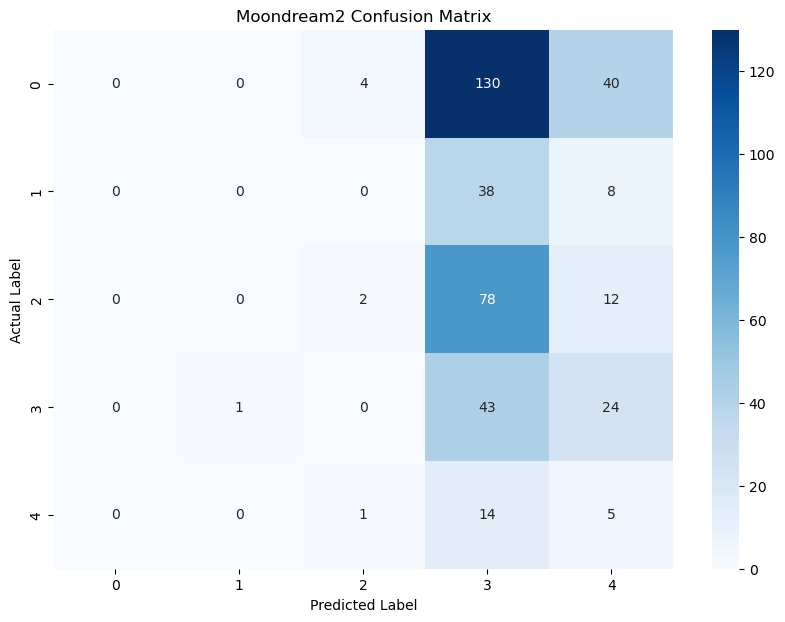

In [8]:
# Confusion Matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(actual_labels), yticklabels=np.unique(actual_labels))
plt.title('Moondream2 Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('Moondream2_confusion_matrix.png')  # Save the confusion matrix figure
plt.show()

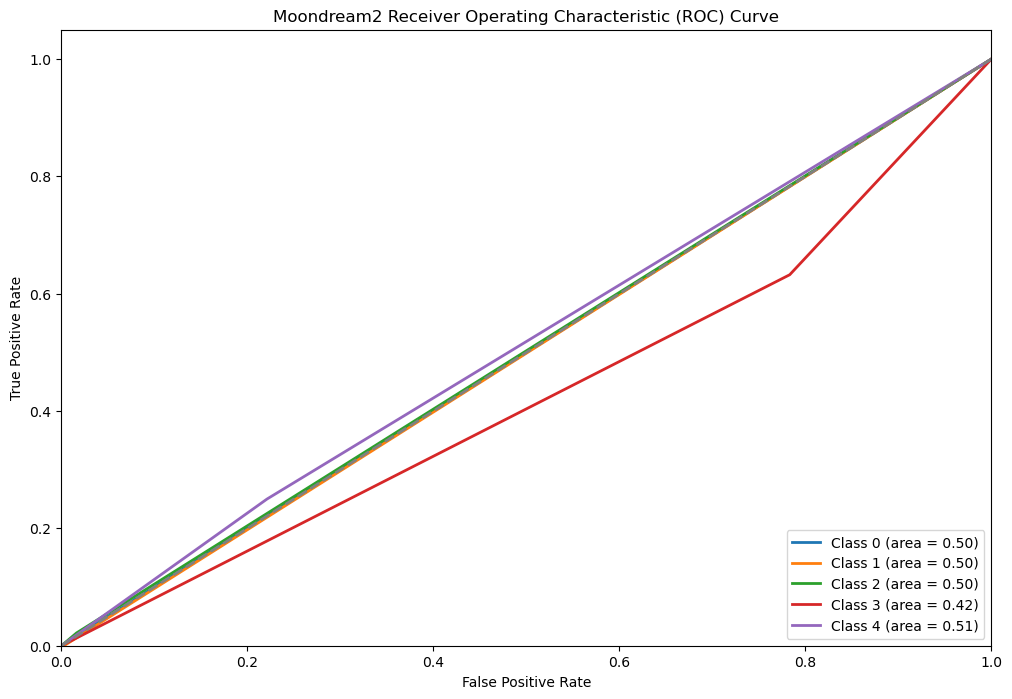

In [9]:
# Binarize the labels for multi-class ROC
classes = np.unique(actual_labels)
y_test_binarized = label_binarize(actual_labels, classes=classes)
y_pred_binarized = label_binarize(predicted_labels, classes=classes)

# Plot ROC curve for each class
plt.figure(figsize=(12, 8))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_label} (area = {roc_auc:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Moondream2 Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('Moondream2_roc_curve.png')  # Save the ROC curve figure
plt.show()